# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("recipe_site_traffic.csv") ## load the dataset
df.head() ## show the first 5 rows

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


### Data validation

In [323]:
## show the shape of the dataset
df.shape

(947, 8)

In [324]:
df.dtypes 

recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object

In [325]:
df.describe() ##show the statistics of numeric columns

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


In [326]:
df.recipe.nunique()

947

From the table obove we notice that there are extreme high values for all numeric columns and the variability of values is relatively high.

* The recipe column is numeric and presents unique identifier of the recipe as expected.

In [327]:
## checking the missing values for each column
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [328]:
df.high_traffic.unique() ## check the unique values of high_traffic column.

array(['High', nan], dtype=object)

* The high_traffic column contains 373 Nan values which means that the recipe is not polupar in these observations.So these missing values in this column will be replaced with the value **"Not high"**

In [5]:
df.high_traffic=df.high_traffic.replace(np.nan,"Not high") 
## replace null values with "Not high" value in high_traffic column.

In [330]:
df[df.calories.isna()].isna().sum()

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

* The 'calories' , 'carbohydrate', 'sugar' and 'protein' columns are all numeric as expected and have each 52 missing values. Since these missing values for these columns are in the same rows I decided to remove these missing values.

In [6]:
#remove missing values
df.dropna(inplace=True)
df.isna().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

In [332]:
df.servings.unique() ## check the unique values of servings column

array(['4', '1', '2', '6', '4 as a snack', '6 as a snack'], dtype=object)

The servings column is not as expected. I removed the 'as a snack' string to keep only 4 unique values and then I converted this column to integer type to match the critiria described for this column.

In [7]:
df.servings=df.servings.str.replace('as a snack','')
df.servings=df.servings.astype("int")
df.servings.unique()

array([4, 1, 2, 6])

In [334]:
df['category'].unique() ## check the unique values of category column

array(['Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Pork', 'Chicken', 'Vegetable',
       'Meat', 'Dessert'], dtype=object)

In The 'category' column I have removed 'Breast' from the 'Chicken Breast' value so that there will be 10 unique recipes categories as described in the critira.

In [8]:
df.category=df.category.str.replace(' Breast','')
df['category'].nunique()

10

After validation our dataset contains 895 rows and 8 columns without missing values.

## Exploratory data analysis

#### Is the data balanced across the high_traffic classes: "High" and "Not high"?

<AxesSubplot: title={'center': 'Number of observations for each high_traffic class'}, ylabel='high_traffic'>

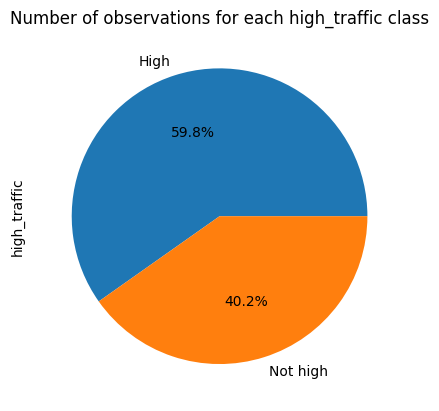

In [336]:
df.high_traffic.value_counts().plot.pie(title="Number of observations for each high_traffic class",autopct='%1.1f%%')

From the pie chart, we see that the class "High" represent 60% of the observations. This slight imbalance between the two classes will not disturb us from our data analysis and modeling.



#### What are the most frequent categories of recipes displayed on website home page ?


<AxesSubplot: title={'center': 'Number of recipies used per category'}, xlabel='Count'>

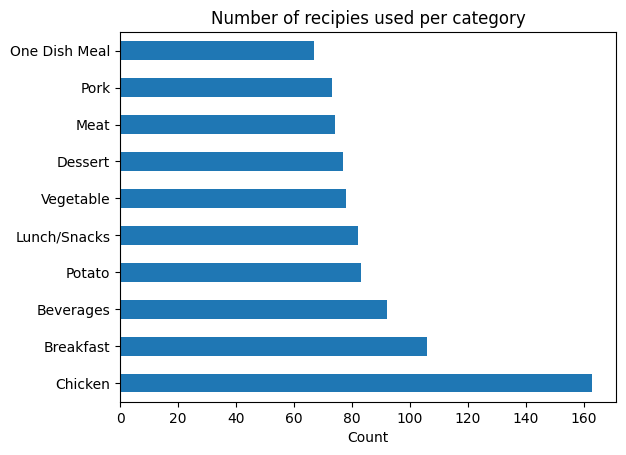

In [337]:
df.category.value_counts().plot.barh(xlabel="Count",title=
    "Number of recipies used per category")

As shown in the bar chart above the most recipe category used is the "Chicken" category  recipes . It seems like the Chicken recipes are the most popular according to the product manager. Let's check the relationship between the popularity of recipes and their categories.

#### Is there a relationship between high traffic and recipes categories ?

Text(0.5, 1.0, 'relationship between the high traffic and category of recipe')

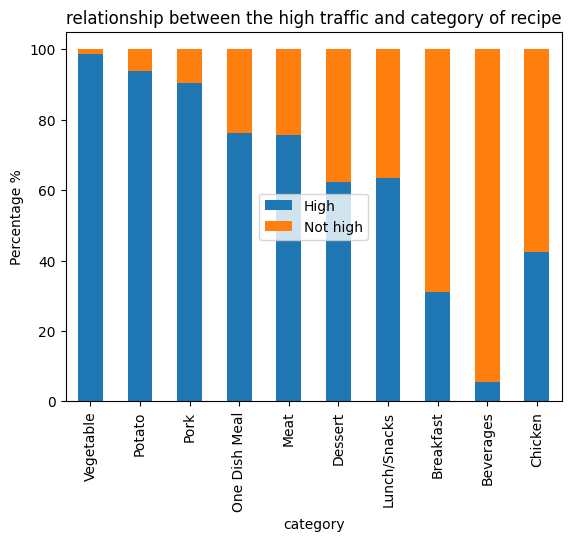

In [338]:
categ_table=df.pivot_table(index='category',columns=['high_traffic'],values='recipe',aggfunc='count').sort_values(['Not high'])
total_count=categ_table.sum(axis=1)
categ_table["High"]=round(categ_table["High"]/total_count*100,2)
categ_table["Not high"]=round(categ_table["Not high"]/total_count*100,2)
categ_table.plot.bar(stacked=True,ylabel='Percentage %')
plt.legend(loc='center')
plt.title("relationship between the high traffic and category of recipe")

From this visualization we notice that the recipes categories are divided into two groups: One group in which the recipes are more likely to be popular(high traffic) and a second group in which the recipes are more likely to not lead to a high traffic. The best result is for the "Vegetable" category and the worst result is for the "Beverages" category . We can say that the traffic is recipe category responsive.

#### Distribution of calories,protein,sugar and carbohydrate among the recipes

<AxesSubplot: xlabel='high_traffic', ylabel='carbohydrate'>

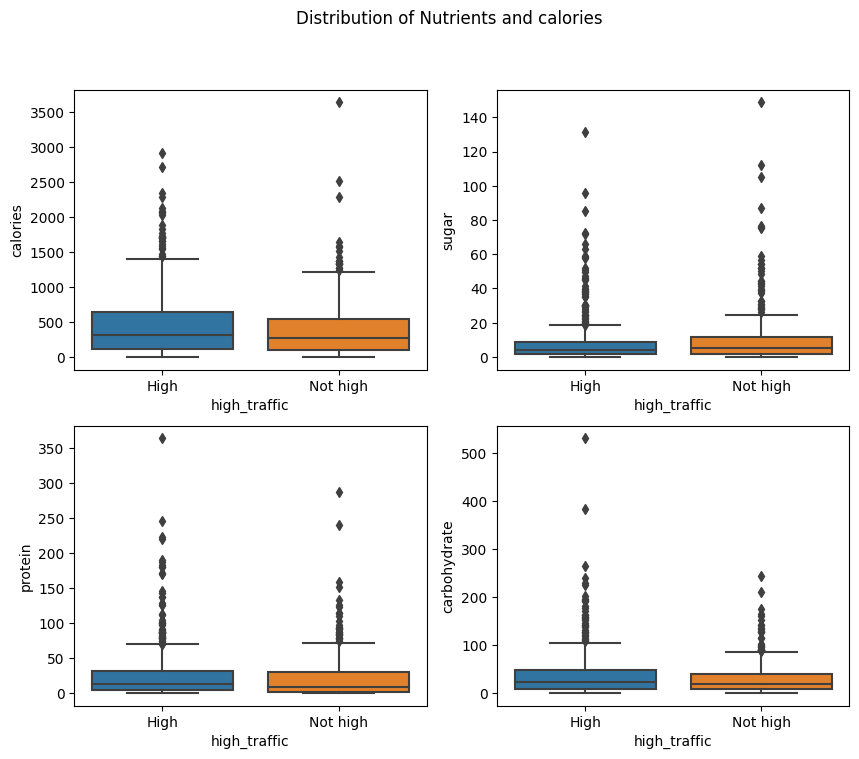

In [339]:
fig, axes = plt.subplots(2,2, figsize=(10, 8))
fig.suptitle('Distribution of Nutrients and calories')

sns.boxplot(ax=axes[0,0],data=df, y="calories",x='high_traffic')

sns.boxplot(ax=axes[0,1],data=df,y='sugar',x='high_traffic')

sns.boxplot(ax=axes[1,0],data=df,y='protein',x='high_traffic')

sns.boxplot(ax=axes[1,1],data=df,y='carbohydrate',x='high_traffic')




We notice from the boxplots above thatThe recipes with low traffic seem to provide  a little bit more amount of sugar but less amount of carbohydrate and number of calories compared to high traffic recipes. But
this is a slight and not significant difference between the two classes(High and Not high).


`####` distribution of servings of recipes 

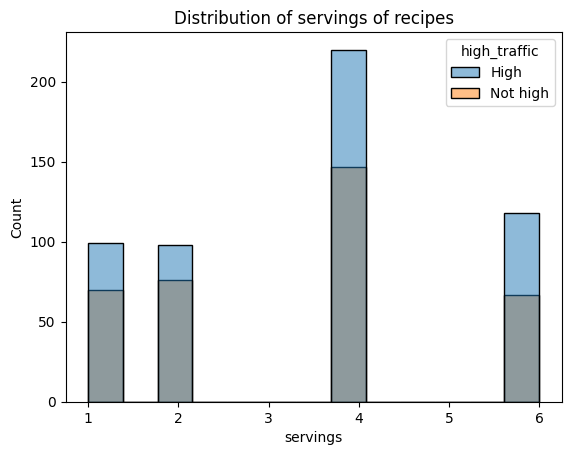

In [340]:
ax=sns.histplot(data=df,x='servings',hue='high_traffic').set(title='Distribution of servings of recipes')


We notice that the most commun number of servings for the recipes is 4 servings. But there is no significant relationship beween the servings and the traffic.


### Model development


#### What type of problem this is?

The buisness goal is to predict whether a given recipe is popular(high traffic) or not. So this is a binary classification problem. Our target column is **'high_traffic'** which has 2 classes.

I have chosen to use all the dataset attributes to fit our models except the 'recipe' column since it contains unique values.

Before we dive into fitting a machine learning model we need to provide to our model a preprocessed data. We will begin by encoding our nominal columns.

In [9]:
# One hot encoding with get_dummies of pandas.
df=pd.get_dummies(df,columns=['category'])
df.head()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
1,2,35.48,38.56,0.66,0.92,4,High,0,0,0,0,0,0,0,0,1,0
2,3,914.28,42.68,3.09,2.88,1,Not high,0,1,0,0,0,0,0,0,0,0
3,4,97.03,30.56,38.63,0.02,4,High,1,0,0,0,0,0,0,0,0,0
4,5,27.05,1.85,0.80,0.53,4,Not high,1,0,0,0,0,0,0,0,0,0
5,6,691.15,3.46,1.65,53.93,2,High,0,0,0,0,0,0,1,0,0,0


In [10]:
# data seggregation
X=df.drop(['recipe','high_traffic'],axis=1)

y=df['high_traffic']

In [34]:
# splitting data into traing set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,random_state=25, stratify=y)

In [13]:
print("X_train ", X_train.shape)
print("X_test ", X_test.shape)

X_train  (716, 15)
X_test  (179, 15)


To fit a baseline model I have chosen to use the logistic regression model as it is the baseline model for a binary classification.

In [35]:
# fitting the logistic regression model
from sklearn.linear_model import LogisticRegression

logistic= LogisticRegression()
logistic.fit(X_train,y_train)
log_pred=logistic.predict(X_test)



I have chosen to compare our baseline model (logistic regression) with the Naive Bayes model as it is not sensible to outliers.

In [36]:
# fitting naive bayes model
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred=gnb.predict(X_test)



### Comparison of the two models

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print("LogisticRegression report: ")
print(classification_report(y_test,log_pred))
print("confusion matrix : \n", confusion_matrix(y_test,log_pred))
print("========================")

print("Naive bayes report: ")
print(classification_report(y_test,gnb_pred))
print("confusion matrix : \n", confusion_matrix(y_test,gnb_pred))

LogisticRegression report: 
              precision    recall  f1-score   support

        High       0.78      0.78      0.78       107
    Not high       0.67      0.67      0.67        72

    accuracy                           0.73       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.73      0.73      0.73       179

confusion matrix : 
 [[83 24]
 [24 48]]
Naive bayes report: 
              precision    recall  f1-score   support

        High       0.85      0.64      0.73       107
    Not high       0.61      0.83      0.71        72

    accuracy                           0.72       179
   macro avg       0.73      0.74      0.72       179
weighted avg       0.76      0.72      0.72       179

confusion matrix : 
 [[69 38]
 [12 60]]



The baseline logistic regression model gives us an accuracy of **78%** and a precisoon of **80%** for the class "High". The naive bayes model gives better precision for "High" class:**82%**, but a lower global accuracy:**71%** . We will retain the logistic regression model as it detects better the high recipes(recall=**85%**) and predicts **80%** of the time the high traffic recipes which is our business goal.

We will try to improve  the performance of the logistic regression model using hyperparameter tuning.


In [17]:
from sklearn.model_selection import GridSearchCV
solver=['lbfgs','newton-cg','liblinear']
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(solver=solver,C=C,max_iter=max_iter)

from sklearn.metrics import precision_score, make_scorer
# definning the score metric to evaluate the estimator which is the precisionscore for the class 'High'
precision_high= make_scorer(precision_score, pos_label='High')
                              
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1,
                    scoring= precision_high)

grid_result = grid.fit(X,y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.795720 using {'C': 1.0, 'max_iter': 100, 'solver': 'newton-cg'}


In [33]:
# refitting the logistic regression model
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression(penalty='l2',C= 1.0, max_iter=100, solver='newton-cg')
logreg.fit(X_train,y_train)
logreg_pred=logreg.predict(X_test)

# reevaluating the model
from sklearn.metrics import accuracy_score
print("accuracy = ", round(accuracy_score(y_test, logreg_pred),2))
print("precision (High) = ", round(precision_score(y_test, logreg_pred, pos_label="High"),2))

    

accuracy =  0.78
precision (High) =  0.8


We note that the precision score for 'High' class did not evolve after hyperparameter tuning for the logistic regression model, neither the accuracy score 

### Business metric :

As the goal of the product manager is to increase the  traffic to the website and to choose the right recipe for the website home page. I propose to use these two metrics to monitor what he wants to accomplish :
* The  traffic to the website: if it goes up or not in the following period.Since the data provided does not contain information about this metric I can not estimate it based on the current data.
* The percentage of recipes leading to high traffic over the total amount of the recipes displayed on the home page in the future. Based on the current data, the estimated value of this metric is **60%** .
As our developed model predicts correctly the popular recipes 80% of time. It will help to increase these 2 metrics.

### Recommendations 

I recommend to the product manager the following points :
* Choosing the recipes belonging to the "Vegetable" , "Potato","Pork","One Dish Meal" and "Meat" categories as they are more likely to lead to high traffic to the website.
* Deploy our developed machine learning model to identify the recipes that will be popular and obtain a higher website traffic.
* Collecting data about the traffic to the website relative to each recipe in order to measure the first defined metric.
* Using our defined business metrics to monitor the popularity of the used recipes.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation